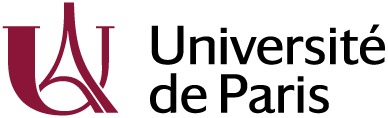
# Intro to Python - Class 6
## Sylvain Lobry, 28/11/2022

In today's class, we will see:
* Matplotlib
* A few words about scikit-learn and scikit-image

## 0 Before we start
* The traditional Wooclap
* Questions about the project?

## 1 Matplotlib

Matplotlib is a package that has been designed to plot data in Python.

In the areas that you will probably work in after this MSc, you will have to manipulate large quantities of data. This data can be of different form: numerical, image, ... .

By now, I hope you are convinced that Python is a good option to perform data manipulation tasks. It is easy and fast to write high-level code, while packages such as numpy offer good performances in terms of computation time. However, when you write with large amount of data, it is important to visualize it. For that, the package Matplotlib is ideal.

Matplotlib was created by John D. Hunter with a first release in 2003. We will see in this class that this package can be both very easy to use but also let the user good possibilites to customize their plots. In this way, it plays a big role in Python's popularity as a scientific programming language.

As a side note, a large part of today's scientific articles use matplotlib to draw the plots.


### 1.1 Two interfaces
Matplotlib features two main interfaces:
* Pyplot, an easy to manipulate interface
* The object-oriented interface, which is harder to master but is more scalable (i.e. easier to work on several plots at once).

It is in general recommended to use the pyplot interface when working interactively (i.e. in a jupyter notebook or in the console) and the object-oriented interface when working on scripts. It is also a good idea to not mix interfaces in a same program.

### 1.1 The Pyplot interface

Pyplot was made to imitate Matlab's interface for drawing plots. As such, if you are used to using Matlab, this interface will seem familiar and natural.

Pyplot interface will manage the figures for you (you do not need to keep track of all the opened figures). Let's see an example.

#### 1.1.1 I just want to plot!
Let's start by preparing some data that we might want to plot:

In [17]:
import numpy as np

x = np.arange(0, 4 * np.pi, 0.1)

sin = np.sin(x)
cos = np.cos(x)

To import the pyplot interface from matplotlib, you should use the following line:
```
import matplotlib.pyplot as plt
```
Note that the name `plt` is a standard. As such, you should use this import in most cases (unless you have a particularly good reason not to do so):

In [18]:
import matplotlib.pyplot as plt

In it's simplest form, you can do the following to plot a line:

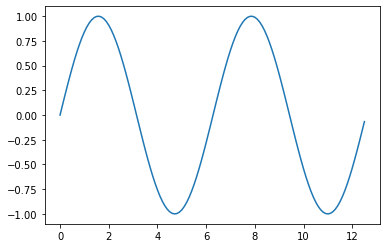

In [19]:
plt.plot(x, sin)

`plot` takes two arrays:
* x values
* y values

It is also possible to plot more than one line on a single plot, by calling twice to the `plot` function.

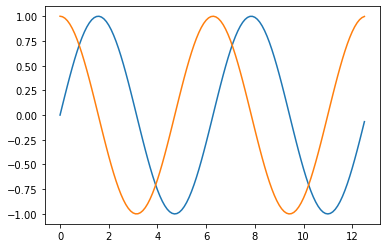

In [20]:
plt.plot(x, sin)
plt.plot(x, cos)

#### 1.1.2 Customization

While this might actually be good enough for very simple visualization, you might want to customize your plot to make it easier to understand.

Let's start by explicitely creating a figure:

In [21]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

It has a number of optional arguments, the most common ones are:
* figsize, which takes a 2D tuple indicating the width and the height in inches (1 inch = 2.5 cm).
* dpi (dots per inch), which takes a float as an argument. This is useful when printing

Let's put that in use:

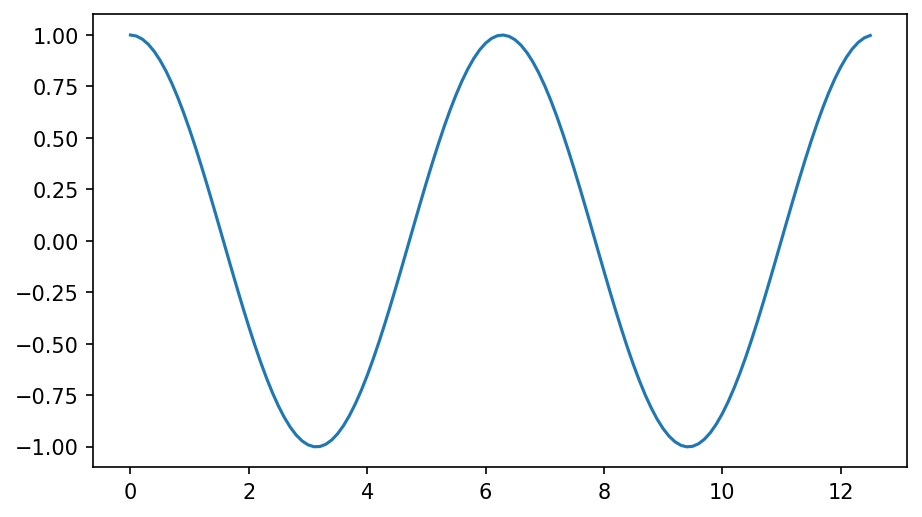

In [22]:
plt.figure(figsize=(7,4), dpi=150)
plt.plot(x, cos)

You can also customize your lines, with the linestyles. There are a good number of them, but the main ones are:
* '-', i.e. solid (default one)
* '--', i.e. dashed
* '-.', i.e. dashdot

and the markers:
* 'o', circle marker
* '^', triangle marker
* '+', plus marker
* '.', dotted marker

You can also add colors:
* 'k' for black
* 'w' for white
* 'b' for blue
* 'g' for green
* 'r' for red
* 'c' for cyan
* 'm' for magenta

To use them, you simply chain them in a string after your x and y arrays. Let's see an example:

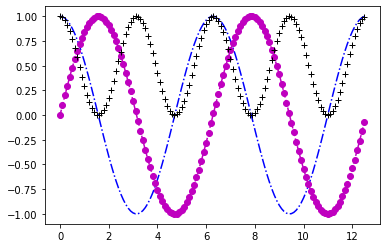

In [23]:
plt.figure()
plt.plot(x, cos, 'b-.')
plt.plot(x, sin, '--om')
plt.plot(x, cos**2, '+k')

In most cases, you should also have to add axis labels. This is done using the functions `plt.xlabel` and `plt.ylabel`, which each take a string as an input:

Text(0, 0.5, 'value')

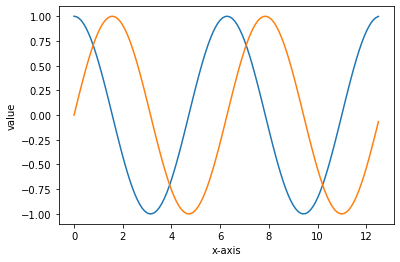

In [24]:
plt.figure()
plt.plot(x, cos)
plt.plot(x, sin)
plt.xlabel("x-axis")
plt.ylabel("value")

You can also add a title, with `plt.title`:

Text(0.5, 1.0, 'Example')

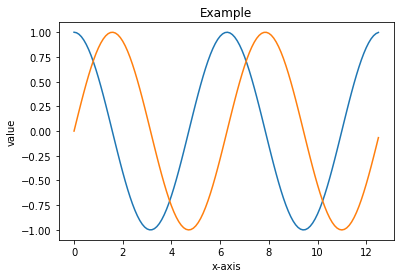

In [25]:
plt.figure()
plt.plot(x, cos)
plt.plot(x, sin)
plt.xlabel("x-axis")
plt.ylabel("value")
plt.title("Example")

There are two ways to add legend, and we will focus on the clearest one.

An optional argument to `plt.plot` is label. If you give it a string and then call the plt.legend() function, a legend will appear. Here is a simple example:

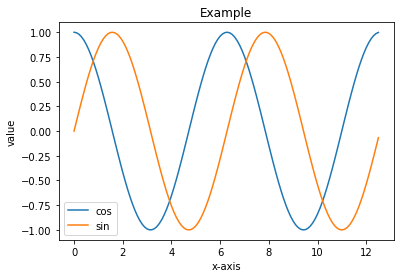

In [26]:
plt.figure()
plt.plot(x, cos, label="cos")
plt.plot(x, sin, label="sin")
plt.xlabel("x-axis")
plt.ylabel("value")
plt.title("Example")
plt.legend()

#### 1.1.3 Saving figures

You can save the nice plots you have made with matplotlib by using the function `plt.savefig(filename)`, where `filename` is the name of the file you want to save in. Note that by default, it will try to infer the extension from the filename, and if not set, will by default save the figure as a png image. You can change all of these default, but this is beyond the scope of this class.

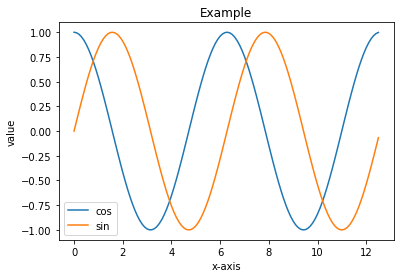

In [27]:
plt.figure()
plt.plot(x, cos, label="cos")
plt.plot(x, sin, label="sin")
plt.xlabel("x-axis")
plt.ylabel("value")
plt.title("Example")
plt.legend()
plt.savefig("my_plot.svg")

Note that saving as an svg is a good option when you want to put this plot in a LaTeX report or if you want to manually modify your figure (using inkscape for instance).

#### 1.1.4 Half a break

Most of you probably know [xkcd](https://www.xkcd.com). If not, two examples: 

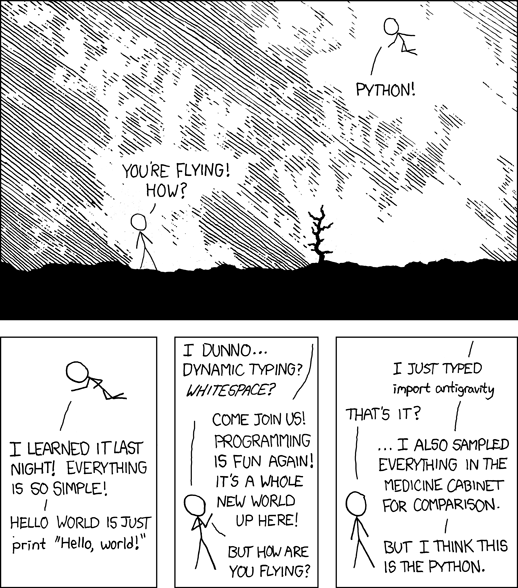

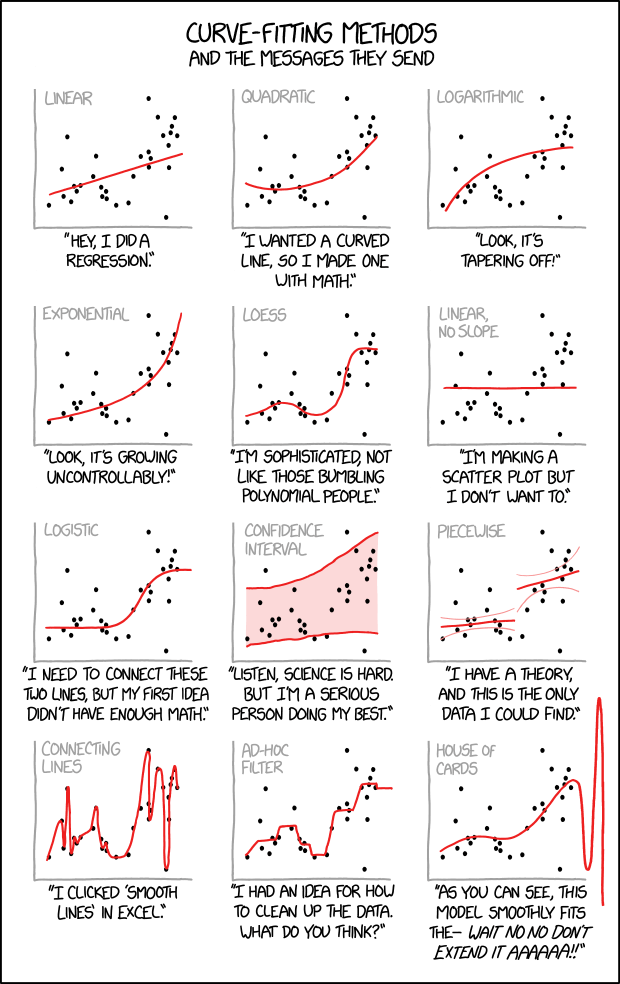

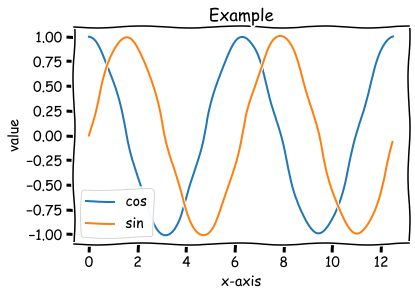

In [28]:
with plt.xkcd():
    plt.figure()
    plt.plot(x, cos, label="cos")
    plt.plot(x, sin, label="sin")
    plt.xlabel("x-axis")
    plt.ylabel("value")
    plt.title("Example")
    plt.legend()

Back to the wooclap!

#### 1.1.5 Other types of plots

So far, we have seen the line plot, but this is of course not the only one you can do with matplotlib.

We will now quickly review some other plots that you might use. Once again, keep in mind that this is not an exhaustive list.

**Plotting an image**

You can plot an image with matplotlib using `plt.imshow`. It supports arrays with shapes:
* (H, W): the image is shown with false colors
* (H, W, 3): interpreted as RGB
* (H, W, 4): interepreted as RGBA (RGB with transparency)

To load the image, you can use `matplotlib.image.imread()`:

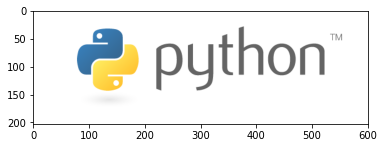

In [29]:
import matplotlib.image as mimg

img = mimg.imread('pythonlogo.png')
plt.imshow(img)

**Plotting an histogram**

You can plot an histogram using the `plt.hist()` function. This function takes an array as an input and an optional `bins` argument (defaulting to 10)

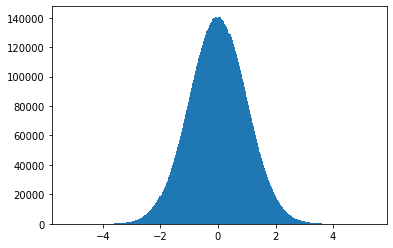

In [30]:
distribution = np.random.normal(size=int(10e6))
_ = plt.hist(distribution, bins=300)

**Scatter plots**

You can plot points by using `plt.scatter` and passing the x and y coordinates as two arrays:

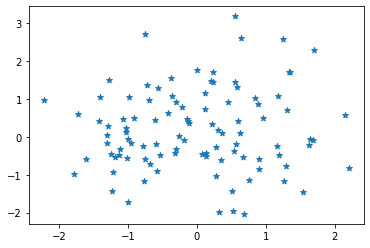

In [31]:
x = np.random.normal(size=100)
y = np.random.normal(size=100)

plt.scatter(x, y, marker='*')

### 1.2 The object oriented interface

We will not go in details on the object-oriented interface of matplotlib, but we will see enough so you can understand codes written with this interface and the documentation.

First, you have to understand a the concept of figures and axes. Let's see an example of a figure containing multiple plots:

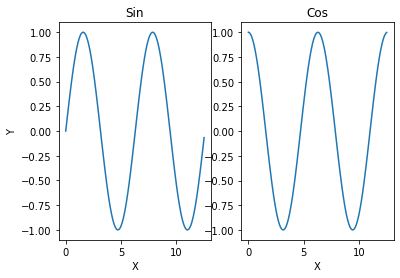

In [32]:
x = np.arange(0, 4 * np.pi, 0.1)

sin = np.sin(x)
cos = np.cos(x)

fig, ax = plt.subplots(1,2)

ax[0].plot(x, sin)
ax[1].plot(x, cos)

ax[0].set_title("Sin")
ax[1].set_title("Cos")

ax[0].set_xlabel("X")
ax[1].set_xlabel("X")
ax[0].set_ylabel("Y")

plt.show()

In this plot, you have one **figure**, which is the whole plot. This figure contains 2 **axes** which contains the data related to our plots. These axes, and the figure are objects.

They contain methods (such as `plot`, `set_xlabel`, ...) that you can call to fill your axes, and hence your figure.

**Conclusion on matplotlib**

We have seen the tools to make most of the graph that you would need to do using the Pyplot interface, and barely scratched the surface on the object-oriented interface.

Know that in theory, they are equivalent. However, the object oriented interface gives you more control at the price of more complex instructions.

## 2 A word about scikit-learn and scikit-image

**scikit-learn**

scikit-learn is a package implementing various machine learning tools. Initially developed by David Cournapeau, the developement was carried on in INRIA. The first release dates from 2010.

You should use this package if you want to test a machine learning model and to analyze the results of a model.
Note that it has been designed to be fully interoperable with numpy. Therefore, you can also use it if you used another tool for your ML task.

Link to the [documentation](https://scikit-learn.org/stable/user_guide.html).

**scikit-image**

scikit-image is another package for image manipulation in Python initially developed by Stéfan van der Walt. It implements various image processing routines, also compatible with NumPy. Note that there is also a Python's version of OpenCV.

Link to the [documentation](https://scikit-image.org/docs/stable/).

## Conclusion

That's it for this class. We have seen:
* An intro to C++
* Python

With that, you should be able to understand a source code written in any of the two language, contribute or write simple programs from sratch.

**You still have to work!!**

* Project (29/11), "defences" next week
* Exam (TBA)

**What to expect in the exam?**

(this is only indicative and subject to change)

1. QCM (type wooclap)
2. Simple questions/definition
3. Critical analysis of a program
4. Writing a program to solve a specific problem

## Questions?